In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## how Severity the Accidents is ?

In [5]:
# Files to laod
#accident_data= "DataFile/mock_accident_data.csv"

accident_data="https://umausdata.s3.amazonaws.com/DataFile/mock_accident_data.csv"
accident_df=pd.read_csv(accident_data)

In [6]:
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,time_duration
0,1502402,2,2021-03-18 12:40:52,2021-03-18 14:41:21,32.649949,-96.840110,0.032,S Polk St,R,Dallas,...,False,False,False,Day,2021,Mar,18,12,Thu,120.0
1,2046004,2,2020-10-07 18:51:00,2020-10-07 20:09:48,37.496093,-120.871708,0.130,CA-99 N,R,Turlock,...,False,False,False,Night,2020,Oct,7,18,Wed,79.0
2,1837738,2,2020-12-31 13:47:30,2021-01-01 03:05:51,35.798227,-78.558346,0.267,New Bern Ave,L,Raleigh,...,False,False,False,Day,2020,Dec,31,13,Thu,798.0
3,2132032,3,2020-05-22 14:11:55,2020-05-22 15:28:28,42.006400,-71.224580,0.000,I-495 S,R,Mansfield,...,False,False,False,Day,2020,May,22,14,Fri,77.0
4,2225114,4,2020-03-28 03:16:31,2020-03-28 03:46:31,43.682980,-88.442100,0.003,I-41 S,R,Fond du Lac,...,False,False,False,Night,2020,Mar,28,3,Sat,30.0


In [7]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 50000 non-null  int64  
 1   Severity           50000 non-null  int64  
 2   Start_Time         50000 non-null  object 
 3   End_Time           50000 non-null  object 
 4   Start_Lat          50000 non-null  float64
 5   Start_Lng          50000 non-null  float64
 6   Distance(mi)       50000 non-null  float64
 7   Street             50000 non-null  object 
 8   Side               50000 non-null  object 
 9   City               50000 non-null  object 
 10  County             50000 non-null  object 
 11  State              50000 non-null  object 
 12  Zipcode            50000 non-null  object 
 13  Timezone           50000 non-null  object 
 14  Temperature(F)     50000 non-null  float64
 15  Wind_Chill(F)      50000 non-null  float64
 16  Humidity(%)        500

In [8]:
#Drop the null columns where all values are null
accident_df=accident_df.dropna(axis='columns',how='all')

In [9]:
accident_df.shape

(50000, 43)

In [10]:
print(accident_df.columns)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'time_duration'],
      dtype='object')


In [11]:
#drop the non-beneficial columns
accident_df=accident_df.drop(columns=['ID','Start_Time','End_Time','Zipcode'])
#reaso for droping columns
#ID: since they don't carry any information for the severity
#Start_Time,End_Time :because it was decomposed by the time features added before (day, month, weekday,Year)
#Zipcode :because we just focus on the City,County,state where the accident happened


In [12]:
accident_df.shape

(50000, 39)

In [13]:
accident_df.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Timezone              object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset        object
Year                   int64
Month         

In [14]:
# Determine the number of unique values in each column.
accident_df.nunique()

Severity                 4
Start_Lat            46082
Start_Lng            46185
Distance(mi)          4542
Street               17079
Side                     2
City                  4669
County                 992
State                   49
Timezone                 4
Temperature(F)         182
Wind_Chill(F)          376
Humidity(%)             98
Pressure(in)           793
Visibility(mi)          36
Wind_Direction          23
Wind_Speed(mph)         62
Precipitation(in)       90
Weather_Condition       66
Amenity                  2
Bump                     2
Crossing                 2
Give_Way                 2
Junction                 2
No_Exit                  2
Railway                  2
Roundabout               2
Station                  2
Stop                     2
Traffic_Calming          2
Traffic_Signal           2
Turning_Loop             1
Sunrise_Sunset           2
Year                     6
Month                   12
Day                     31
Hour                    24
W

In [15]:
#Drop Null coluns
accident_df=accident_df.drop(columns=[])

In [16]:
#Drop Null values
accident_df=accident_df.dropna()

In [17]:
accident_df.shape

(50000, 39)

In [18]:
# examine home _ownwrship
street_count=accident_df['Street'].value_counts()

In [19]:
list(street_count[street_count<20].index)

[' Jefferson Davis Hwy',
 ' NE 125th St',
 'Adirondack Northway S',
 'Beachline Expy',
 ' S Kirkman Rd',
 ' State Highway 38',
 'US-169 S',
 'CA-134 W',
 ' NE 135th St',
 'CA-118 E',
 'I-395 S',
 ' Nolensville Pike',
 ' Highway 101 S',
 'US-30 E',
 'FDR Dr S',
 ' River Rd',
 ' W Dixie Hwy',
 ' Highway 1',
 'CA-180 W',
 'Governor John Davis Lodge Tpke S',
 'San Diego Fwy S',
 ' Redwood Hwy',
 'US-6 E',
 'Adirondack Northway N',
 ' Airline Hwy',
 'Beltline Hwy N',
 'CA-58 W',
 'CT-15 N',
 'CA-94 E',
 ' NE 163rd St',
 'US-87 N',
 'CA-118 W',
 ' W Manchester Ave',
 'I-440 E',
 ' W Cary St',
 ' Colima Rd',
 ' S Azusa Ave',
 'GA-407 W',
 'I-287 W',
 ' Creedmoor Rd',
 'I-395 N',
 ' S Claiborne Ave',
 'CA-57 N',
 ' S Figueroa St',
 'I-240 E',
 'I-664 N',
 ' NW 103rd St',
 'CA-170 S',
 'US-52 S',
 'Cross Bronx Expy W',
 ' NW 2nd Ave',
 ' NE 123rd St',
 'Cross Westchester Expy W',
 'Hollywood Fwy S',
 ' N Orange Blossom Trl',
 'Lincoln Hwy W',
 ' Santa Cruz Hwy',
 ' SW 127th Ave',
 ' NW 32nd Ave

In [20]:
# Determine which values to replace if counts are less than ...? less than 20
replace_street = list(street_count[street_count<20].index)

# Replace in dataframe
for street in replace_street:
    accident_df.Street = accident_df.Street.replace(street,"Other")
    
# Check to make sure binning was successful
accident_df.Street.value_counts()

Other                    30747
I-5 N                      666
I-95 N                     652
I-95 S                     602
I-5 S                      560
                         ...  
 SW 56th St                 20
 NW 119th St                20
Edsel Ford Fwy W            20
George Washington Brg       20
State Highway 1             20
Name: Street, Length: 291, dtype: int64

In [21]:
# accident_df.to_csv('C:/Users/Helanga/Desktop/THe_Final_Project_Data_Visualization/DataFile/mock_accident_Cleaneddata.csv', sep=',',encoding='utf-8',header='true')

In [22]:
#replace all bollean values to integer
accident_df.replace({False: 0, True: 1}, inplace=True)

In [23]:
accident_df.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Timezone              object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                int64
Bump                   int64
Crossing               int64
Give_Way               int64
Junction               int64
No_Exit                int64
Railway                int64
Roundabout             int64
Station                int64
Stop                   int64
Traffic_Calming        int64
Traffic_Signal         int64
Turning_Loop           int64
Sunrise_Sunset        object
Year                   int64
Month         

In [24]:
# check Severity column
accident_df['Severity'].value_counts()

2    46626
4     1425
3     1410
1      539
Name: Severity, dtype: int64

#### converting the string values into numerical ones using label encoder

In [25]:
# To see which columns have categorical value columns
X_cat = accident_df.select_dtypes(include='object').columns
X_cat

Index(['Street', 'Side', 'City', 'County', 'State', 'Timezone',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Month',
       'Weekday'],
      dtype='object')

In [26]:
# examine all the columns
for column in accident_df[X_cat]:
    print(column,"\n", accident_df[column].value_counts())
    print("--------------------------------------")

Street 
 Other                    30747
I-5 N                      666
I-95 N                     652
I-95 S                     602
I-5 S                      560
                         ...  
 SW 56th St                 20
 NW 119th St                20
Edsel Ford Fwy W            20
George Washington Brg       20
State Highway 1             20
Name: Street, Length: 291, dtype: int64
--------------------------------------
Side 
 R    40600
L     9400
Name: Side, dtype: int64
--------------------------------------
City 
 Miami          2174
Los Angeles    1290
Orlando        1082
Dallas          725
Houston         672
               ... 
Reidsville        1
Laceyville        1
Watkins           1
Tonto Basin       1
Anna              1
Name: City, Length: 4669, dtype: int64
--------------------------------------
County 
 Los Angeles        3714
Miami-Dade         2934
Orange             2185
San Bernardino     1048
San Diego           942
                   ... 
Acadia              

In [27]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()


In [28]:
# Encode single column Side
#
accident_df.Street = le.fit_transform(accident_df.Street)
#
# Print df.head for checking the transformatio

In [29]:
accident_df['Street']

0        270
1         98
2         31
3        270
4        270
        ... 
49995    270
49996    270
49997    198
49998     83
49999    270
Name: Street, Length: 50000, dtype: int32

In [30]:
print(accident_df['Street'].nunique())

291


In [31]:
# Encode single column Side
#
accident_df.Side = le.fit_transform(accident_df.Side)
#
# Print df.head for checking the transformation

In [32]:
accident_df['Side']

0        1
1        1
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    0
Name: Side, Length: 50000, dtype: int32

In [33]:
# Encode single column City
#
accident_df.City = le.fit_transform(accident_df.City)
#
# Print df.head for checking the transformation

In [34]:
accident_df['City']

0        1003
1        4227
2        3433
3        2515
4        1412
         ... 
49995    3586
49996    4439
49997    1933
49998    3684
49999     488
Name: City, Length: 50000, dtype: int32

In [35]:
#accident_df['City'].unique().value_counts
print(accident_df['City'].nunique())

4669


In [36]:
# Encode single column County
#
accident_df.County = le.fit_transform(accident_df.County)
#
# Print df.head for checking the transformation

In [37]:
accident_df['County']

0        248
1        854
2        930
3        106
4        328
        ... 
49995    480
49996    176
49997    397
49998    780
49999    108
Name: County, Length: 50000, dtype: int32

In [38]:
print(accident_df['County'].nunique())

992


In [39]:
# Encode single column State
#
accident_df.State = le.fit_transform(accident_df.State)
#
# Print df.head for checking the transformation

In [40]:
accident_df['State']

0        41
1         3
2        25
3        17
4        46
         ..
49995     3
49996    36
49997    41
49998     3
49999    32
Name: State, Length: 50000, dtype: int32

In [41]:
# Encode single column Timezone 
#
accident_df.Timezone  = le.fit_transform(accident_df.Timezone)
#
# Print df.head for checking the transformation

In [42]:
accident_df['Timezone']

0        0
1        3
2        1
3        1
4        0
        ..
49995    3
49996    1
49997    0
49998    3
49999    1
Name: Timezone, Length: 50000, dtype: int32

In [43]:
# Encode single column Wind_Direction 
#
accident_df.Wind_Direction  = le.fit_transform(accident_df.Wind_Direction)
#
# Print df.head for checking the transformation

In [44]:
accident_df['Wind_Direction']

0         9
1         5
2        21
3        19
4         7
         ..
49995     0
49996     8
49997     5
49998     5
49999     2
Name: Wind_Direction, Length: 50000, dtype: int32

In [45]:
# Encode single column Weather_Condition 
#
accident_df.Weather_Condition  = le.fit_transform(accident_df.Weather_Condition)
#
# Print df.head for checking the transformation

In [46]:
accident_df['Weather_Condition']

0        41
1         9
2        31
3         9
4        48
         ..
49995     5
49996    41
49997     9
49998     5
49999    48
Name: Weather_Condition, Length: 50000, dtype: int32

In [47]:
# Encode single column Sunrise_Sunset 
#
accident_df.Sunrise_Sunset  = le.fit_transform(accident_df.Sunrise_Sunset)
#
# Print df.head for checking the transformation

In [48]:
accident_df['Sunrise_Sunset']

0        0
1        1
2        0
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    1
Name: Sunrise_Sunset, Length: 50000, dtype: int32

In [49]:
# Encode single column Day 
#
accident_df.Weekday  = le.fit_transform(accident_df.Weekday)
#
# Print df.head for checking the transformation

In [50]:
accident_df['Weekday']

0        4
1        6
2        4
3        0
4        2
        ..
49995    1
49996    0
49997    5
49998    5
49999    0
Name: Weekday, Length: 50000, dtype: int32

In [51]:
# Encode single column Day 
#
accident_df.Month  = le.fit_transform(accident_df.Month)
#
# Print df.head for checking the transformation

In [52]:
accident_df['Month']

0         7
1        10
2         2
3         8
4         7
         ..
49995     2
49996     5
49997    10
49998     9
49999     7
Name: Month, Length: 50000, dtype: int32

In [53]:
accident_df.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Street                 int32
Side                   int32
City                   int32
County                 int32
State                  int32
Timezone               int32
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction         int32
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition      int32
Amenity                int64
Bump                   int64
Crossing               int64
Give_Way               int64
Junction               int64
No_Exit                int64
Railway                int64
Roundabout             int64
Station                int64
Stop                   int64
Traffic_Calming        int64
Traffic_Signal         int64
Turning_Loop           int64
Sunrise_Sunset         int32
Year                   int64
Month         

#### Split the Data into Training and Testing

In [54]:
# Create our features
X = accident_df.drop("Severity",axis=1) 
X.head()

,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,time_duration
0,32.649949,-96.840110,0.032,270,1,1003,248,41,0,55.0,...,0,0,0,0,2021,7,18,12,4,120.0
1,37.496093,-120.871708,0.130,98,1,4227,854,3,3,76.0,...,0,0,0,1,2020,10,7,18,6,79.0
2,35.798227,-78.558346,0.267,31,0,3433,930,25,1,53.0,...,0,0,0,0,2020,2,31,13,4,798.0
3,42.006400,-71.224580,0.000,270,1,2515,106,17,1,82.0,...,0,0,0,0,2020,8,22,14,0,77.0
4,43.682980,-88.442100,0.003,270,1,1412,328,46,0,42.0,...,0,0,0,1,2020,7,28,3,2,30.0


In [55]:
X.describe()

,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,time_duration
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,36.025829,-96.711552,0.692360,232.059020,0.812000,2390.560020,544.188860,18.211340,1.553440,61.779638,...,0.000680,0.093560,0.0,0.379040,2020.532160,5.674880,16.109420,12.898580,2.99496,340.250860
std,5.470312,18.240538,1.434331,66.793292,0.390716,1278.324348,242.670168,15.113075,1.121824,18.569929,...,0.026068,0.291219,0.0,0.485153,0.721593,3.555957,8.714551,5.927471,2.09665,9160.559685
min,24.601611,-124.496920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.000000,...,0.000000,0.000000,0.0,0.000000,2016.000000,0.000000,1.000000,0.000000,0.00000,2.000000
25%,32.959975,-117.968920,0.047000,213.000000,1.000000,1337.000000,383.000000,3.000000,1.000000,50.000000,...,0.000000,0.000000,0.0,0.000000,2020.000000,2.000000,9.000000,8.000000,1.00000,73.000000
50%,35.731735,-91.144941,0.211000,270.000000,1.000000,2621.000000,580.000000,11.000000,1.000000,64.000000,...,0.000000,0.000000,0.0,0.000000,2021.000000,6.000000,16.000000,14.000000,3.00000,105.000000
75%,40.088786,-80.347276,0.788000,270.000000,1.000000,3462.000000,738.000000,35.000000,3.000000,76.000000,...,0.000000,0.000000,0.0,1.000000,2021.000000,9.000000,23.000000,17.000000,5.00000,154.000000
max,48.964400,-67.841889,66.563000,290.000000,1.000000,4668.000000,991.000000,48.000000,3.000000,114.000000,...,1.000000,1.000000,0.0,1.000000,2021.000000,11.000000,31.000000,23.000000,6.00000,602987.000000


In [56]:
X['Precipitation(in)'].describe()

count    50000.000000
mean         0.005745
std          0.039890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.030000
Name: Precipitation(in), dtype: float64

In [57]:
X['Pressure(in)'].describe()

count    50000.000000
mean        29.361870
std          1.108233
min         19.940000
25%         29.200000
50%         29.730000
75%         29.970000
max         30.710000
Name: Pressure(in), dtype: float64

In [58]:
#Create our target
y = accident_df['Severity']
y.value_counts()

2    46626
4     1425
3     1410
1      539
Name: Severity, dtype: int64

In [59]:
# examine shape of X

X.shape

(50000, 38)

In [60]:
y.shape

(50000,)

#### Split encoded Data into Training and Testing

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

In [62]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [63]:
y_train.value_counts()

2    34977
4     1067
3     1045
1      411
Name: Severity, dtype: int64

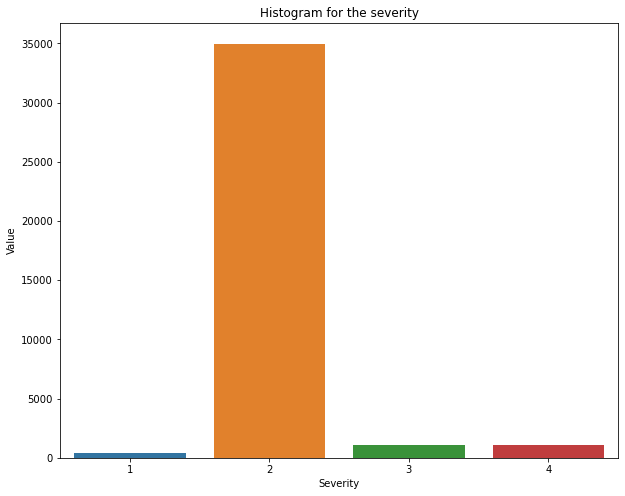

In [64]:
# imbalanced data set
import matplotlib.pyplot 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

severity_counts = y_train.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [66]:
#logistic regression before resampling
# Train the Logistic Regression model before resampling data
#model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs',random_state=1)
#fit
clf.fit(X,y)
#predict using the predict method
y_pred = clf.predict(X_test)

In [67]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)

0.25

## Handle unbalanced data

### Oversampling
###### In this section, compared two oversampling algorithms to determine which algorithm results in the best performance.And oversampled the data using the naive random oversampling algorithm and the SMOTE algorithm. 


#### Naive Random Oversampling

In [68]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled,y_resampled =ros.fit_resample(X_train,y_train)

In [69]:
# what is the "balance" or mix between Severity
Counter(y_resampled)

Counter({2: 34977, 4: 34977, 3: 34977, 1: 34977})

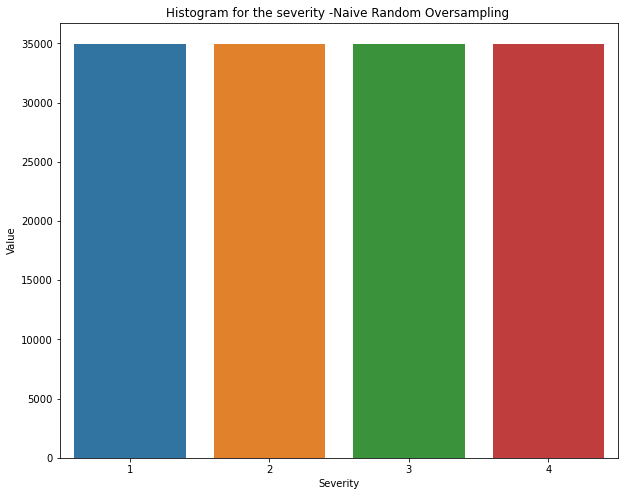

In [70]:
severity_counts = y_resampled.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity -Naive Random Oversampling ")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [71]:
# Train the Logistic Regression model using the resampled data
#model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs',random_state=1)
#fit
clf.fit(X_resampled,y_resampled)
#predict using the predict method
y_pred = clf.predict(X_test)

In [72]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)

0.5237097201215136

In [73]:
# Display the confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)
cm

array([[  94,    3,   28,    3],
       [1406, 4459, 1301, 4483],
       [ 111,   19,  208,   27],
       [  64,   57,   91,  146]], dtype=int64)

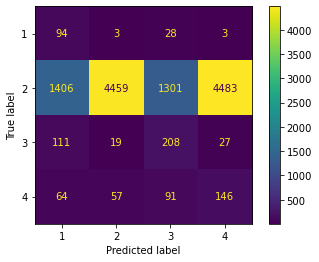

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= clf.classes_)
disp.plot()

In [75]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.06      0.73      0.87      0.10      0.80      0.63       128
          2       0.98      0.38      0.91      0.55      0.59      0.33     11649
          3       0.13      0.57      0.88      0.21      0.71      0.49       365
          4       0.03      0.41      0.63      0.06      0.51      0.25       358

avg / total       0.92      0.39      0.90      0.52      0.59      0.33     12500



#### SMOTE Oversampling

In [76]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)

In [77]:
#check the balance of Loan_status
Counter(y_resampled)

Counter({2: 34977, 4: 34977, 3: 34977, 1: 34977})

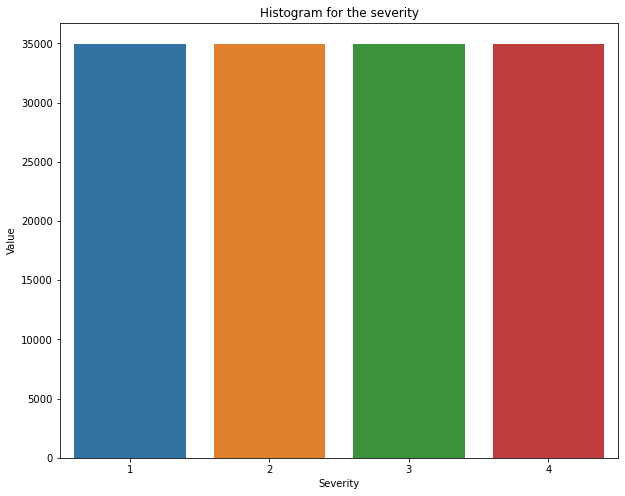

In [78]:
severity_counts = y_resampled.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [79]:
# Train the Logistic Regression model using the resampled data
#model
clf = LogisticRegression(solver='lbfgs', random_state=1)

#train/fit
clf.fit(X_resampled, y_resampled)

#predict
y_pred = clf.predict(X_test)

In [80]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.5133252552369428

In [81]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  96,    7,   23,    2],
       [1344, 4397, 1193, 4715],
       [ 113,   30,  185,   37],
       [  61,   66,   81,  150]], dtype=int64)

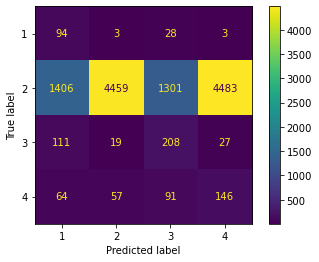

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= clf.classes_)
disp.plot()

In [83]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.06      0.75      0.88      0.11      0.81      0.65       128
          2       0.98      0.38      0.88      0.54      0.58      0.32     11649
          3       0.12      0.51      0.89      0.20      0.67      0.44       365
          4       0.03      0.42      0.61      0.06      0.50      0.25       358

avg / total       0.92      0.39      0.87      0.52      0.58      0.32     12500



### Undersampling
###### In this section, tested an undersampling algorithms to determine which algorithm results in the best performance compared to the oversampling algorithms above.  undersampled the data using the Cluster Centroids algorithm

#### ClusterCentroids resampler

In [91]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

#### Logistic Regression using the resampled data

In [92]:
# Train the Logistic Regression model using the resampled data
#model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs',random_state=1)
#fit
clf.fit(X_resampled,y_resampled)
#predict using the predict method
y_pred = clf.predict(X_test)

In [93]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)


0.4687506426403316

In [94]:
# Display the confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)
cm

array([[ 106,    0,   17,    5],
       [1631, 2796, 4610, 2612],
       [ 172,    8,  164,   21],
       [  89,   29,  112,  128]], dtype=int64)

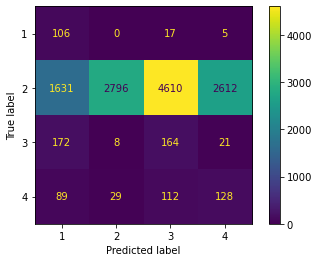

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= clf.classes_)
disp.plot()

In [96]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.05      0.83      0.85      0.10      0.84      0.70       128
          2       0.99      0.24      0.96      0.39      0.48      0.21     11649
          3       0.03      0.45      0.61      0.06      0.52      0.27       365
          4       0.05      0.36      0.78      0.08      0.53      0.27       358

avg / total       0.92      0.26      0.94      0.37      0.49      0.22     12500



#### Combination (Over and Under) Sampling
###### In this section, tested a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above.  Resampled the data using the SMOTEENN algorithm .

##### SMOTEENN algorithm

In [97]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete

                                                    
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)       
Counter(y_resampled)

Counter({1: 34918, 2: 26416, 3: 34468, 4: 34278})

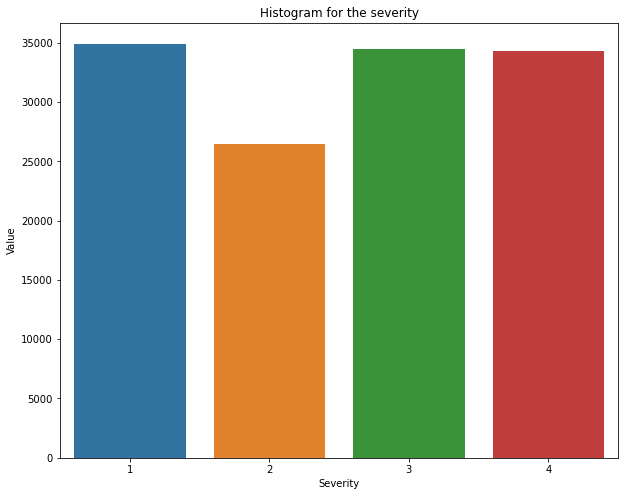

In [98]:
severity_counts = y_resampled.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

#### Logistic Regression using the resampled(Over and Under) data

In [99]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
#model
clf = LogisticRegression(solver='lbfgs', random_state=1)
#fit
clf.fit(X_resampled, y_resampled)
#predict
y_pred = clf.predict(X_test)

In [100]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5101917307947101

In [101]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred,labels=clf.classes_)
cm

array([[  97,    5,   22,    4],
       [1405, 3257, 1234, 5753],
       [ 107,   22,  198,   38],
       [  61,   46,   86,  165]], dtype=int64)

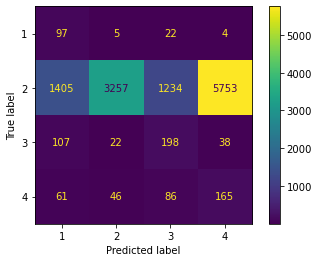

In [102]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= clf.classes_)
disp.plot()

In [103]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.06      0.76      0.87      0.11      0.81      0.65       128
          2       0.98      0.28      0.91      0.43      0.51      0.24     11649
          3       0.13      0.54      0.89      0.21      0.69      0.47       365
          4       0.03      0.46      0.52      0.05      0.49      0.24       358

avg / total       0.92      0.30      0.90      0.41      0.51      0.25     12500



#### Ensemble Learners
###### In this section,  compared two ensemble algorithms to determine which algorithm results in the best performance. trained a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier .

#### Balanced Random Forest Classifier

In [104]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier

In [105]:
# Resample the training data with the BalancedRandomForestClassifier

#model
brf_model = BalancedRandomForestClassifier(random_state=1, n_estimators=100)
#fit
brf_model = brf_model.fit(X_train, y_train)

#predict
predictions = brf_model.predict(X_test)


In [121]:
# Calculated the balanced accuracy score
accuracy = balanced_accuracy_score(y_test,predictions)
accuracy



0.7453219663254573

In [107]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1","Predicted 2", "Predicted 3"])

cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,117,0,11,0
Actual 1,362,9179,491,1617
Actual 2,42,15,262,46
Actual 3,12,78,67,201


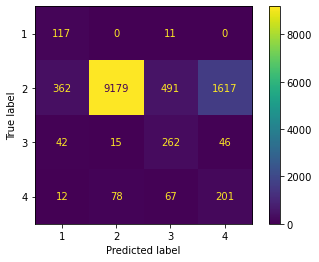

In [118]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= clf.classes_)
disp.plot()


In [108]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.22      0.91      0.97      0.35      0.94      0.88       128
          2       0.99      0.79      0.89      0.88      0.84      0.69     11649
          3       0.32      0.72      0.95      0.44      0.83      0.67       365
          4       0.11      0.56      0.86      0.18      0.70      0.47       358

avg / total       0.94      0.78      0.89      0.84      0.83      0.69     12500



In [109]:
# We can sort the features by their importance.
sorted (zip(brf_model.feature_importances_,X.columns),reverse=True)

[(0.10573568123429763, 'time_duration'),
 (0.09762413915760933, 'Distance(mi)'),
 (0.09626506760179798, 'Year'),
 (0.07413045150827781, 'Start_Lng'),
 (0.0697138882914525, 'Start_Lat'),
 (0.044686873296526056, 'State'),
 (0.0431121156907785, 'Pressure(in)'),
 (0.04091787279716245, 'City'),
 (0.03762099763809671, 'County'),
 (0.03669367440609891, 'Humidity(%)'),
 (0.033442233688844455, 'Wind_Chill(F)'),
 (0.03342731393588581, 'Month'),
 (0.03203534767496442, 'Temperature(F)'),
 (0.0303271483492361, 'Hour'),
 (0.028911774900505165, 'Day'),
 (0.024596055886940065, 'Wind_Speed(mph)'),
 (0.024132367658789344, 'Wind_Direction'),
 (0.022567112646750733, 'Timezone'),
 (0.0223682744919483, 'Street'),
 (0.01753760706759764, 'Weekday'),
 (0.017140811424003293, 'Weather_Condition'),
 (0.01611630065102096, 'Traffic_Signal'),
 (0.010077034951576596, 'Crossing'),
 (0.009796091901636392, 'Visibility(mi)'),
 (0.008050505873450626, 'Side'),
 (0.007027901669062507, 'Sunrise_Sunset'),
 (0.0058924076077959

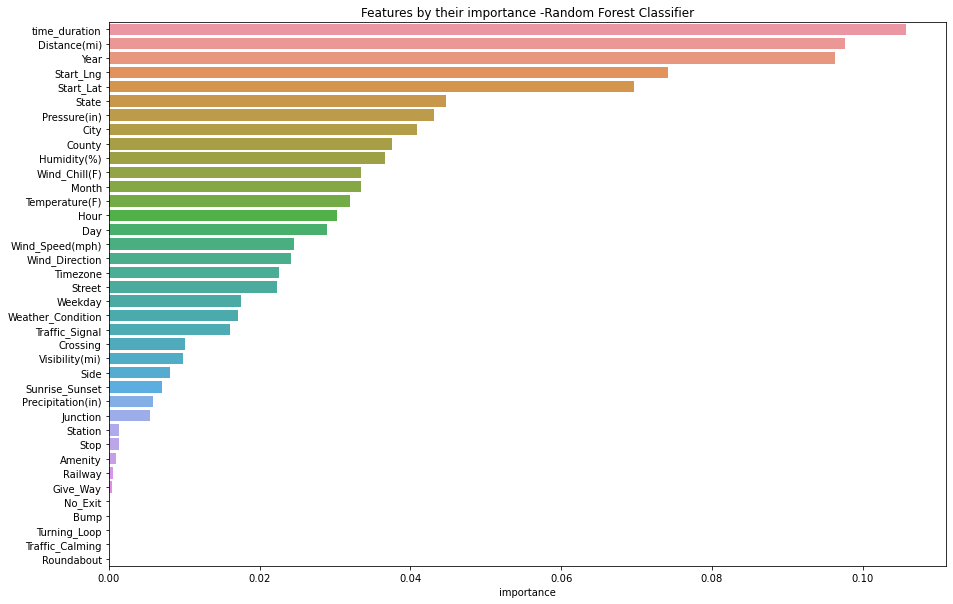

In [113]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = brf_model.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:40]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.title("Features by their importance -Random Forest Classifier")
plt.show()

TypeError: object of type 'numpy.float64' has no len()

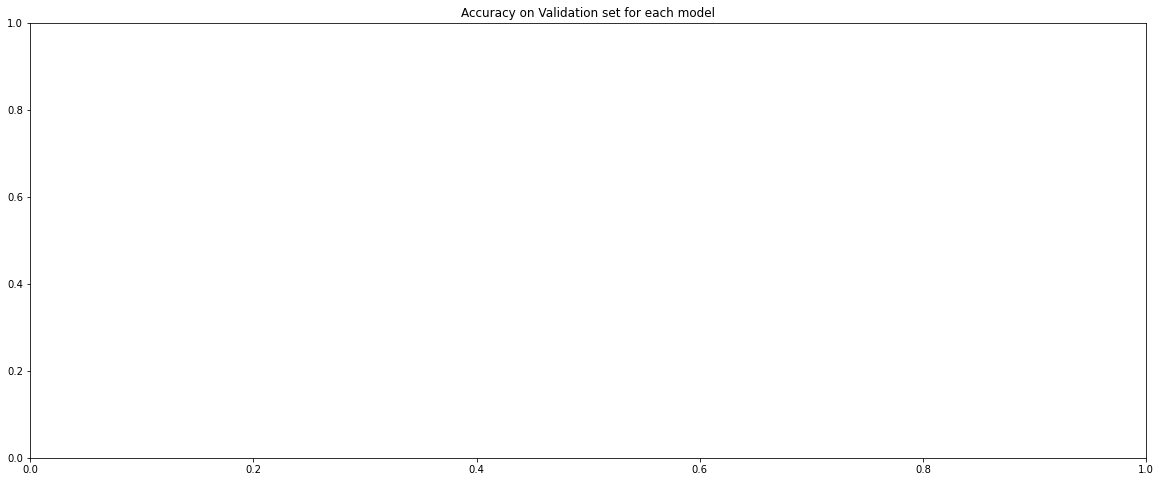

In [124]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

#### Easy Ensemble AdaBoost classifier .

In [ ]:
# Train the EasyEnsembleClassifier
# YOUR CODE HERE
from imblearn.ensemble import EasyEnsembleClassifier
#model
ee_clf = EasyEnsembleClassifier(n_estimators=100,random_state=1)
#fit/train
ee_clf.fit(X_train,y_train)
#predict
y_pred=ee_clf.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test,y_pred)

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test,y_pred)

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
y_pred = ee_clf.predict(X_train)

accuracy["AdaBoost"] = accuracy_score(y_validate, y_pred)
f1["AdaBoost"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()